### unicorn companies 

##### unicorn companies are the companies that worth more than 1 billion dollars 

In [1]:
## importing libiraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
## showing all the rows in the data frame
pd.set_option('display.max_rows',None)

In [3]:
## reading The data 
df=pd.read_csv(r"C:\Users\AMJAD\Desktop\DATA ANALYSIS\Data\Unicorn_Companies.csv")
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [22]:
## Cheacking data types and Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 46.2+ KB


In [23]:
# checking the null values in each column
df.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [1]:
##

# Data cleaning 

In [25]:
## removing the ('$ B')
df['Valuation']=df['Valuation'].str.strip('$ B')
df['Valuation'].head()

0    180
1    100
2    100
3     95
4     46
Name: Valuation, dtype: object

In [26]:
## cheanging the data type to int 
df['Valuation']=df['Valuation'].astype(int)

In [27]:
df['Funding']=df['Funding'].str.strip('$ B M')
df['Funding'].head()

0    8
1    7
2    2
3    2
4    4
Name: Funding, dtype: object

In [28]:
## filling the null values with the mean value 120
df['Funding']=df['Funding'].str.replace('Unknown','120')

In [29]:
df['Funding'].head()

0    8
1    7
2    2
3    2
4    4
Name: Funding, dtype: object

In [30]:
# cheanging the data type
df['Funding']=df['Funding'].astype(int)

In [68]:
#ceating anew column for year joiend 
df['Year Joiend']=df['Date Joined'].str.split('-',expand=True)
df['Year Joiend']

0       2017
1       2012
2       2018
3       2014
4       2011
        ... 
1069    2017
1070    2017
1071    2021
1072    2021
1073    2020
Name: Year Joiend, Length: 1074, dtype: object

In [69]:
## changing the data type 
df['Year Joiend']=df['Year Joiend'].astype(int)

In [70]:
### creatinfg a new column for years needed to become a unicorn company
df['Years Needed']=df['Year Joiend']-df['Year Founded']
df['Years Needed'].head()

0     5
1    10
2    10
3     4
4     6
Name: Years Needed, dtype: int64

## Analysis and visulaization 

### What countries have the most number of unicorne companies 

In [9]:
## filtering the data 
df1=df[['Country','Company']]
df1.head()

,Country,Company
0,China,Bytedance
1,United States,SpaceX
2,China,SHEIN
3,United States,Stripe
4,Sweden,Klarna


In [10]:
# grouping the country column and sorting by the number of countries descending
df1=df1.groupby('Country').count().sort_values(by='Company',ascending=False)
df1.reset_index(inplace=True)
df1=df1.head(10)
df1

,Country,Company
0,United States,562
1,China,173
2,India,65
3,United Kingdom,43
4,Germany,26
5,France,24
6,Israel,20
7,Canada,19
8,Brazil,16
9,South Korea,12


In [14]:
## using bmh style for plots colors
plt.style.use('bmh')

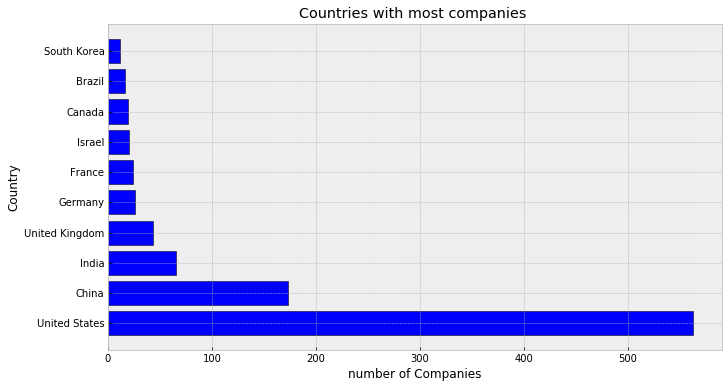

In [15]:
## visulizing the findings
plt.figure(figsize=(11,6))
plt.title('Countries with most companies ')
plt.barh('Country','Company',data=df1,color='blue',edgecolor='black')
plt.xlabel('number of Companies')
plt.ylabel('Country')
plt.show()

## What is the time needed  in avrage to become A unicorn company,
- Compare between time nedded nowdays and backdays

In [ ]:
##

In [75]:
### filtering the Data
df2=df[['Year Founded','Years Needed']]
df2.head()

,Year Founded,Years Needed
0,2012,5
1,2002,10
2,2008,10
3,2010,4
4,2005,6


In [76]:
## getting the Avrage of Years
df2=df2.groupby('Year Founded').mean()
df2.reset_index(inplace=True)
df2.head()

,Year Founded,Years Needed
0,1919,98.0
1,1979,37.0
2,1984,37.0
3,1990,27.0
4,1991,27.0


In [77]:
## rounding to Two decimal points
pd.set_option('display.float_format',lambda x: '%.2f'%x)

In [78]:
## time in the 20 Century
df3=df2.iloc[0:13]
df3

,Year Founded,Years Needed
0,1919,98.00
1,1979,37.00
2,1984,37.00
3,1990,27.00
4,1991,27.00
5,1992,25.00
6,1993,28.00
7,1994,21.50
8,1995,21.50
9,1996,25.00


In [79]:
## Time in The 21 century
df4=df2.iloc[13:]
df4

,Year Founded,Years Needed
13,2000,19.27
14,2001,16.67
15,2002,13.25
16,2003,15.50
17,2004,15.25
18,2005,13.57
19,2006,12.93
20,2007,11.50
21,2008,11.22
22,2009,10.15


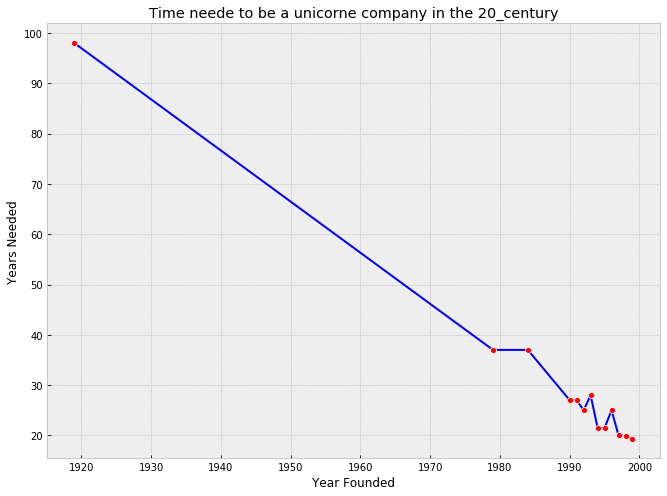

In [80]:
### Visulizing The Findings using seaborn libirary
plt.figure(figsize=(11,8))
plt.title('Time neede to be a unicorne company in the 20_century')
sns.lineplot(x='Year Founded',y='Years Needed',color='blue',marker='o',markers=True,markerfacecolor='red',data=df3)
plt.show()

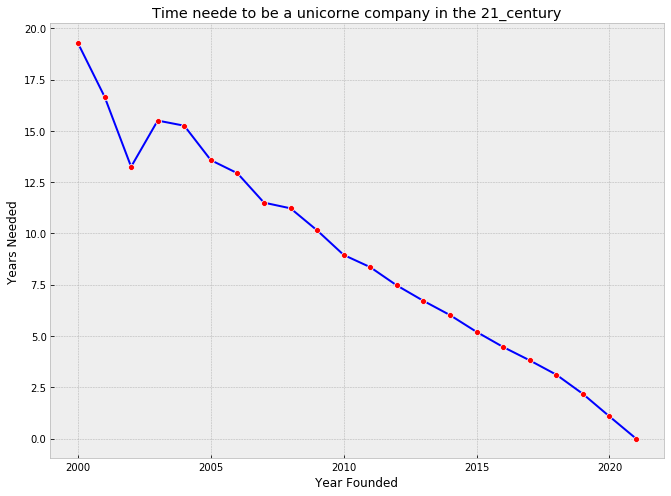

In [81]:
plt.figure(figsize=(11,8))
plt.title('Time neede to be a unicorne company in the 21_century')
sns.lineplot(x='Year Founded',y='Years Needed',color='blue',marker='o',markers=True,markerfacecolor='red',data=df4)
plt.show()

 The number of years has decreased alot  

In [1]:
##

## What are the industries with the most unicorne companies 

In [83]:
## filtering
df5=df[['Industry','Company']]
df5.head()

,Industry,Company
0,Artificial intelligence,Bytedance
1,Other,SpaceX
2,E-commerce & direct-to-consumer,SHEIN
3,Fintech,Stripe
4,Fintech,Klarna


In [84]:
df5=df5.groupby('Industry').count().sort_values(by='Company',ascending=False)
df5.reset_index(inplace=True)
df5=df5.head(14)
df5

,Industry,Company
0,Fintech,224
1,Internet software & services,205
2,E-commerce & direct-to-consumer,111
3,Health,74
4,Artificial intelligence,73
5,Other,58
6,"Supply chain, logistics, & delivery",57
7,Cybersecurity,50
8,Data management & analytics,41
9,Mobile & telecommunications,38


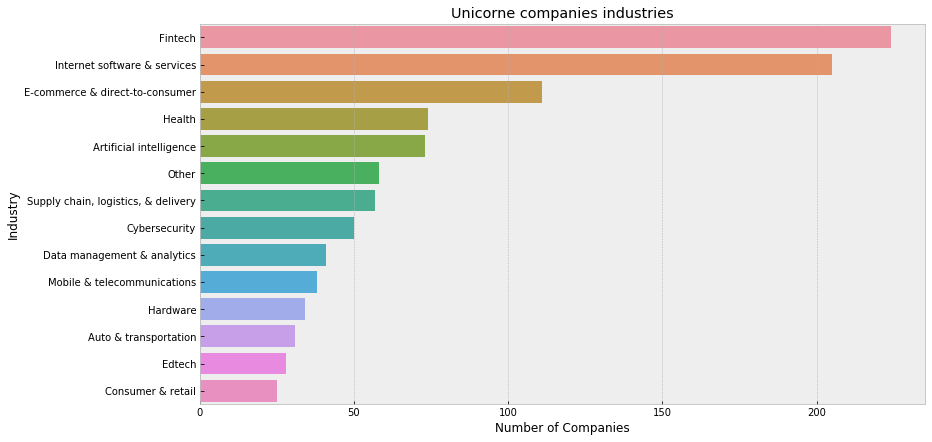

In [85]:
plt.figure(figsize=(13,7))
plt.title('Unicorne companies industries')
sns.barplot(x='Company',y='Industry',data=df5,orient='h')
plt.ylabel('Industry')
plt.xlabel('Number of Companies')
plt.show()

In [1]:
### 

### Are some cities considerd an industry hubs

In [87]:
df10=df[['City','Company']]
df10.head()


,City,Company
0,Beijing,Bytedance
1,Hawthorne,SpaceX
2,Shenzhen,SHEIN
3,San Francisco,Stripe
4,Stockholm,Klarna


In [88]:
df10=df10.groupby('City').count().sort_values(by='Company',ascending=False)
df10.reset_index(inplace=True)
df10=df10.head(10)
df10


,City,Company
0,San Francisco,152
1,New York,103
2,Beijing,63
3,Shanghai,44
4,London,34
5,Bengaluru,29
6,Paris,19
7,Shenzhen,19
8,Palo Alto,18
9,Berlin,17


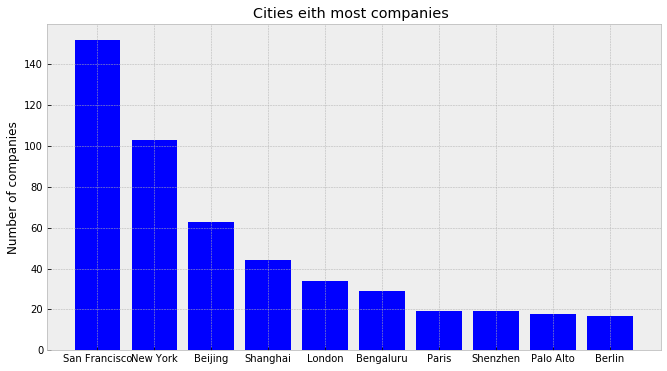

In [89]:
plt.figure(figsize=(11,6))
plt.title('Cities With most companies ')
plt.bar('City','Company',data=df10,color='blue')
plt.ylabel('Number of companies')
plt.show()

In [2]:
###

##  what companies have the biggest return on investment

## retun on investment = valuation - funding 


In [91]:
## companies  with billions fundings
## the biggest billoin funding is 14 billion (data exploration )
df6=df[df['Funding']<=14]
df6.head()


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joiend,Years Needed
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S...",2017,5
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,10
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2,"Tiger Global Management, Sequoia Capital China...",2018,10
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2,"Khosla Ventures, LowercaseCapital, capitalG",2014,4
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4,"Institutional Venture Partners, Sequoia Capita...",2011,6


In [92]:
df6['return on investment']=df6['Valuation']-df6['Funding']
df6['return on investment'].head()

C:\Users\AMJAD\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    172
1     93
2     98
3     93
4     42
Name: return on investment, dtype: int32

In [93]:
df7=df6[['Company','Funding','return on investment']]
df7.sort_values(by='return on investment',ascending='False')
df7=df7.iloc[0:13]
df7.drop(index=8,inplace=True)
df7

,Company,Funding,return on investment
0,Bytedance,8,172
1,SpaceX,7,93
2,SHEIN,2,98
3,Stripe,2,93
4,Klarna,4,42
6,Checkout.com,2,38
7,Instacart,3,36
9,Databricks,3,35
10,Revolut,2,31
11,Epic Games,7,25


- return on investment for the millions funding companies 

In [95]:
## millions funding data
df8=df[df['Funding']>14]
df8.head()


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joiend,Years Needed
5,Canva,40,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,572,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,6
17,Xiaohongshu,20,2016-03-31,E-commerce & direct-to-consumer,Shanghai,China,Asia,2013,918,"GGV Capital, ZhenFund, Tencent",2016,3
18,Miro,18,2022-01-05,Internet software & services,San Francisco,United States,North America,2011,476,"Accel, AltaIR Capital, Technology Crossover Ve...",2022,11
20,Rapyd,15,2019-12-03,Fintech,London,United Kingdom,Europe,2016,770,"Target Global, General Catalyst, Durable Capit...",2019,3
21,Discord,15,2018-04-20,Internet software & services,San Francisco,United States,North America,2012,979,"Benchmark, Greylock Partners, Tencent Holdings",2018,6


In [4]:
#

In [97]:
df9=df8[['Company','Funding']]
df9=df9.head(3)
df9

,Company,Funding
5,Canva,572
17,Xiaohongshu,918
18,Miro,476


In [98]:
df9['return on investment']=[39.4,19,17.5]

In [99]:
df9

,Company,Funding,return on investment
5,Canva,572,39.40
17,Xiaohongshu,918,19.00
18,Miro,476,17.50


In [100]:
## Merging The data frames 
df7=df7.merge(df9,how='outer')
df7

C:\Users\AMJAD\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1108: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,Company,Funding,return on investment
0,Bytedance,8,172.00
1,SpaceX,7,93.00
2,SHEIN,2,98.00
3,Stripe,2,93.00
4,Klarna,4,42.00
5,Checkout.com,2,38.00
6,Instacart,3,36.00
7,Databricks,3,35.00
8,Revolut,2,31.00
9,Epic Games,7,25.00


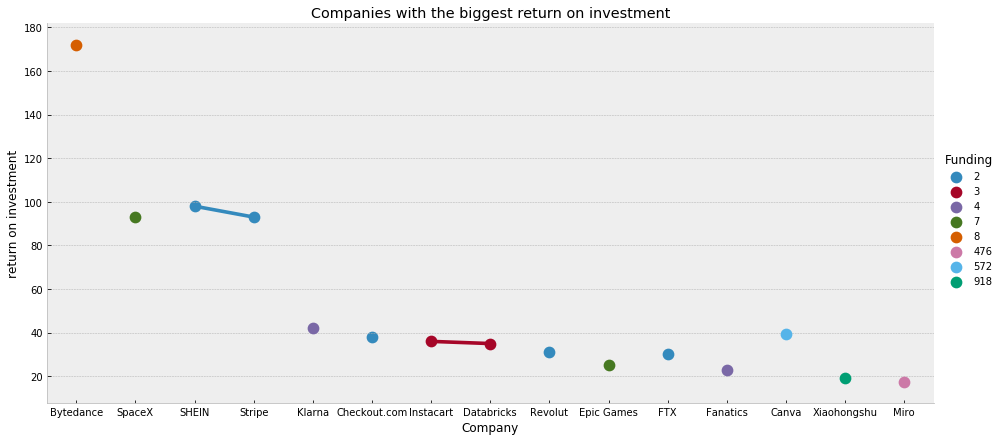

In [101]:
## Visulizing using catplot 
sns.catplot(x='Company',y='return on investment',data=df7,kind='point',aspect=2.2,height=6,hue='Funding')
plt.title('Companies with the biggest return on investment')
plt.show()

### Which investors  invested in more than one  Unicorne company

In [4]:
df8=df[['Company','Select Investors']]
df8.head()

,Company,Select Investors
0,Bytedance,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,"Institutional Venture Partners, Sequoia Capita..."


In [5]:
df8=df8.groupby('Select Investors').count().sort_values(by='Company',ascending=False)
df8=df8.head(4)
df8.reset_index(inplace=True)
df8

,Select Investors,Company
0,Sequoia Capital,3
1,"Speedinvest, Valar Ventures, Uniqa Ventures",2
2,"Two Sigma Ventures, Flint Capital, Commerce Ve...",2
3,General Atlantic,2


In [6]:
df8['Select Investors'][2]=df8['Select Investors'][2].replace('Two Sigma Ventures, Flint Capital, Commerce Ventures','Two Sigma Ventures, Flint Capital')
df8['Select Investors'][1]=df8['Select Investors'][1].replace('Speedinvest, Valar Ventures, Uniqa Ventures','Speedinvest, Valar Ventures')
df8['Select Investors'][3]=df8['Select Investors'][3].replace('Shunwei Capital Partners, China Media Group, G...','Shunwei Capital, China Media ')

C:\Users\AMJAD\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\AMJAD\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df8['Company']=df8['Company'].astype(str)
df8['Company']

0    3
1    2
2    2
3    2
Name: Company, dtype: object

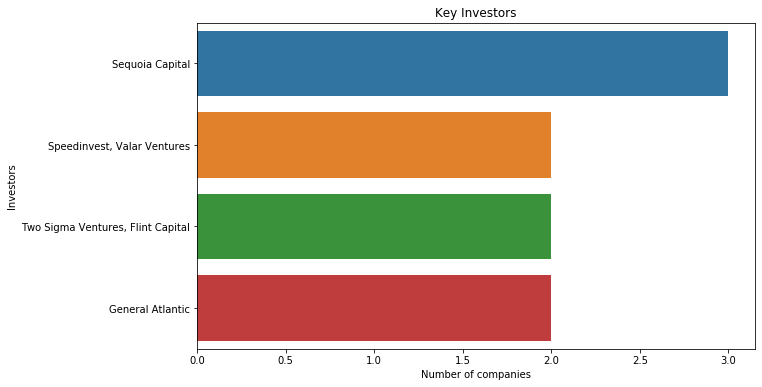

In [8]:
plt.figure(figsize=(10,6))
plt.title('Key Investors')
sns.barplot(x='Company',y='Select Investors',data=df8,orient='h')
plt.ylabel('Investors')
plt.xlabel('Number of companies')
plt.show()

# insights

- United states has the biggest number of unicorne companies with Over 500 companies
- The Time needed for companes to be unicorne has decreased and the reason is the Evolution of Technology
- The most number of companies lies in the Technology Fields like  Fintech, Artificial Intelegance , E-commerse and Internet  Services.
- San Francisco is The city that holds the biggest number of companies with concideration  that san francisco is the city  of technology in the Usa
- Tech companies have the biggest return on investment Comparing to other industries